<a href="https://colab.research.google.com/github/Camiloooooo1/Estudio/blob/main/Estudio_Examen_Ciencia_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clase SM10-Datos Atípicos
Los datos atípicos sonvalores que difieren significativamente del resto de los datos, lo que puede deberse a errores, sesgos o variabilidad natural.

¿Por quese dan estos datos? Causas:
--> Errores en la recolección o ingesta de datos.
--> Respuestas intencionalmente alteradas (ej, fumadores q mienten en encuestas)
--> Muestreo incorrecto (encuestar a menores sobre elecciones)
--> Variabilidad natural.

Son importante spq pueden distorsionar resultados, afectar distribuciones y hacer cocnlusiones erroneas.
Se aplican en detección de fraudes, anomalías en redes, diagnosticos médicos, etc.

#Tecnicas de Detección
Se clasifican segun numero de atributos involucrados.
Univariados: Basados en una sola variable (ej: diagramas de caja)
Bivariado: COnsidera 2 variables
Multivariado: Por mas de dos variables.




In [2]:
# Importar set de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Importar datos
archivo = "https://raw.githubusercontent.com/lecuevasp/BaseDeDatos/refs/heads/main/diabetes_imputados_knn.csv"
df_raw = pd.read_csv(archivo, sep="|", encoding='latin-1') # lectura de csv desde el objeto  url
df =  df_raw.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.333333,33.6,0.627,50,1
1,1,85.0,66.0,29.0,66.666667,26.6,0.351,31,0
2,8,183.0,64.0,30.0,195.000000,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


In [6]:
df.isna().sum() #Para ver si la base de datos cargada efectivamente no presenta valores nulos

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Una vez confirmamos que no hay Nan, empezamos a hacer la deteccion de valores atipicos.

In [7]:
df_descripcion = df.describe() #Para conocer la distrib. de datos.
df_descripcion.T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.0000,6.00000,17.00
Glucose,768.0,121.563368,30.550074,44.000,99.000000,117.0000,141.00000,199.00
BloodPressure,768.0,72.342448,12.221390,24.000,64.000000,72.0000,80.00000,122.00
SkinThickness,768.0,29.099392,9.580304,7.000,22.333333,29.0000,35.00000,99.00
Insulin,768.0,153.414062,100.846193,14.000,83.000000,132.0000,191.00000,846.00
BMI,768.0,32.426259,6.889295,18.200,27.500000,32.1500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.0000,1.00000,1.00


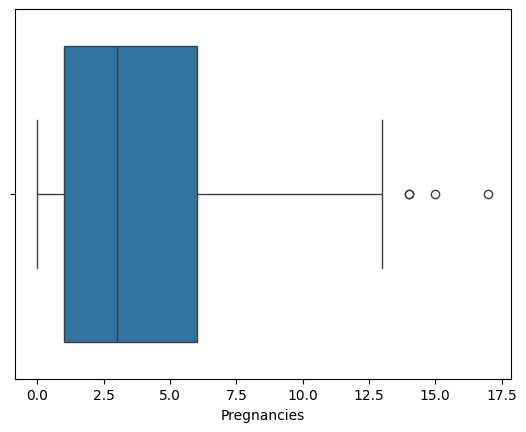

In [8]:
sns.boxplot(data = df['Pregnancies'], orient = 'h' )
plt.show()

Para detectar valores atipicos, procederemos a visualizar un box plot por cada una de las variables.

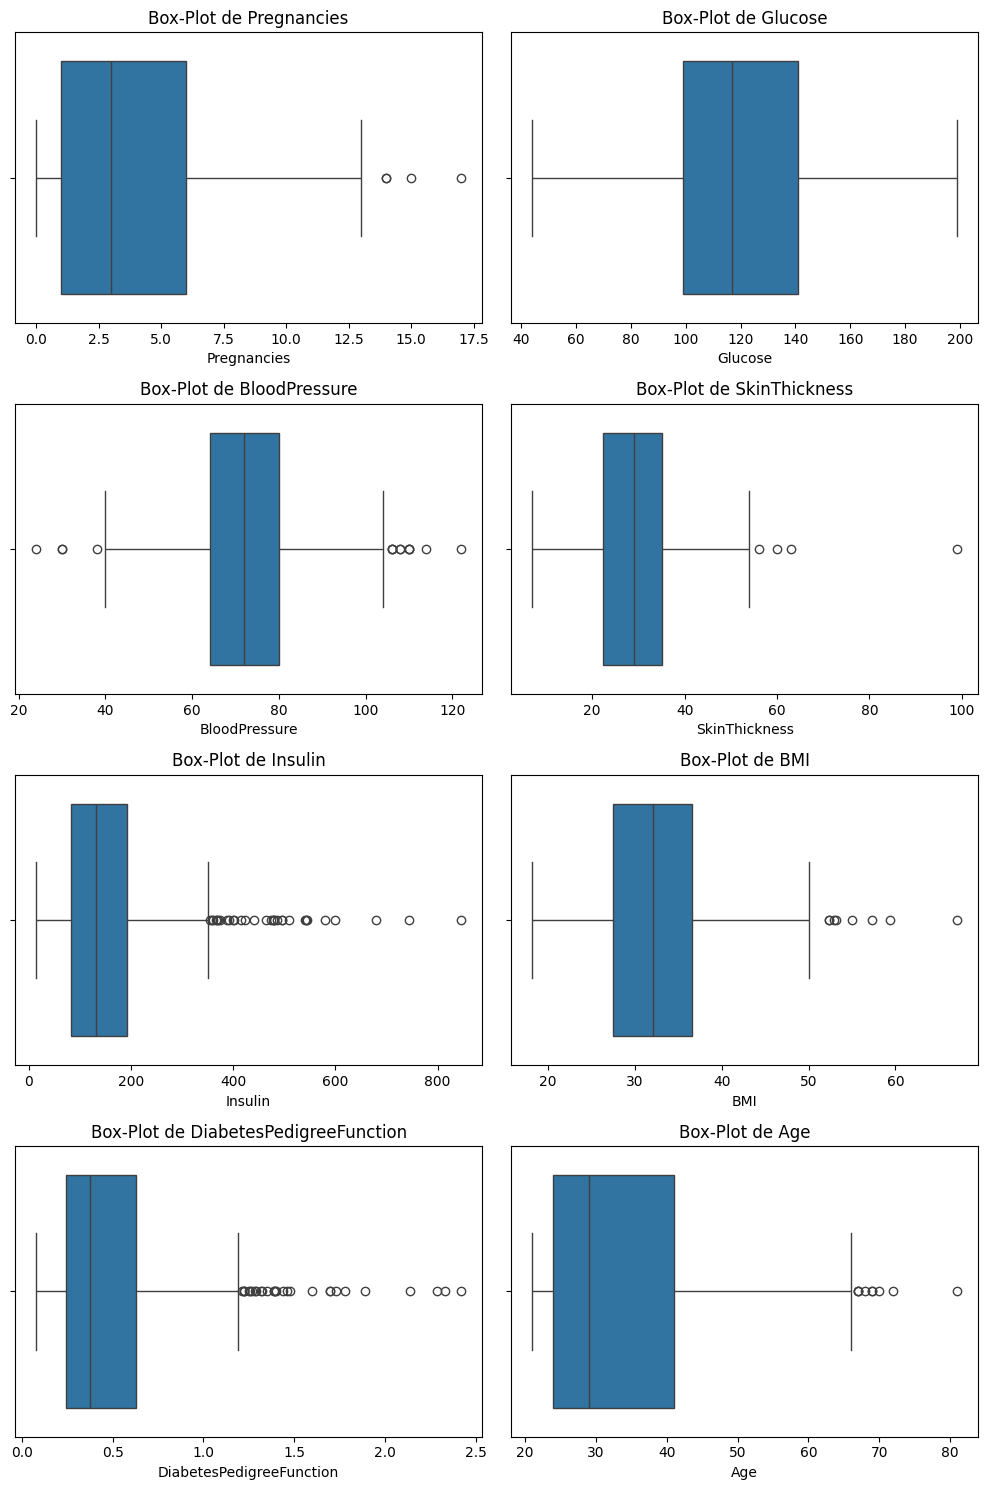

In [9]:
# Crea una figura y ejes para los subplots donde se imprimirán los box-plot
fig, axes = plt.subplots(math.ceil(len(df.iloc[:,:-1].columns)/2), 2, figsize=(10,15))

# Itera sobre cada columna y su respectivo eje
for columna, ax in zip(df.iloc[:,:-1].columns, axes.flatten()):
    sns.boxplot(data=df[columna], orient='h', ax=ax)
    ax.set_title(f"Box-Plot de {columna}")  # Establece el título del subplot

# Ajusta automáticamente el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


Vemos que hay valores atipicos en casi todas las variables. Visualizaremos las variables que los tienen y se excluirá la var. explicativa Outcome.

[]

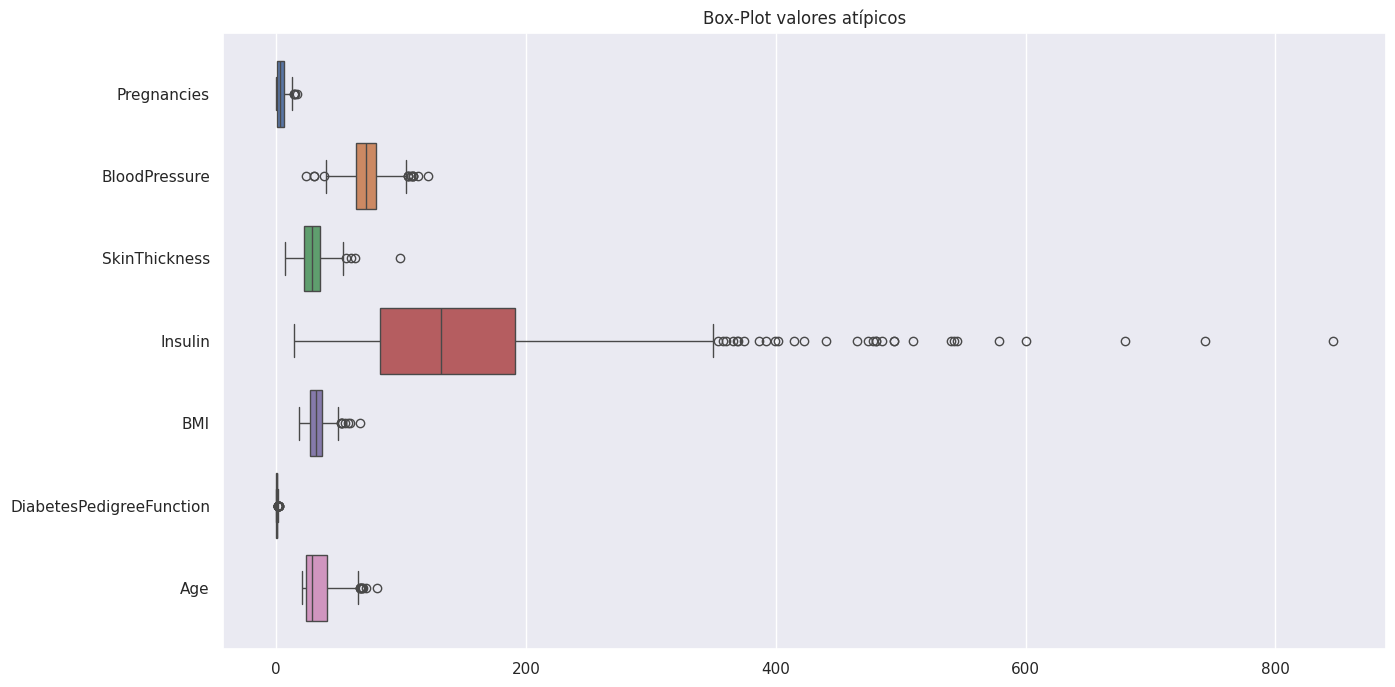

In [10]:
# Seleccionar variables de interes
outlier = df.iloc[:, [0,2,3,4,5,6,7]]

# Fijar tamaño
sns.set(rc = {'figure.figsize':(15,8)})
# Construir caja de diagrama
sns.boxplot(data= outlier, orient='h').set_title("Box-Plot valores atípicos")
plt.plot()

 Para lograr detectar los valores reales, se realizarán tres métodos cuantitativos utilizados en estadistica para la detección de valores atípicos univariados.

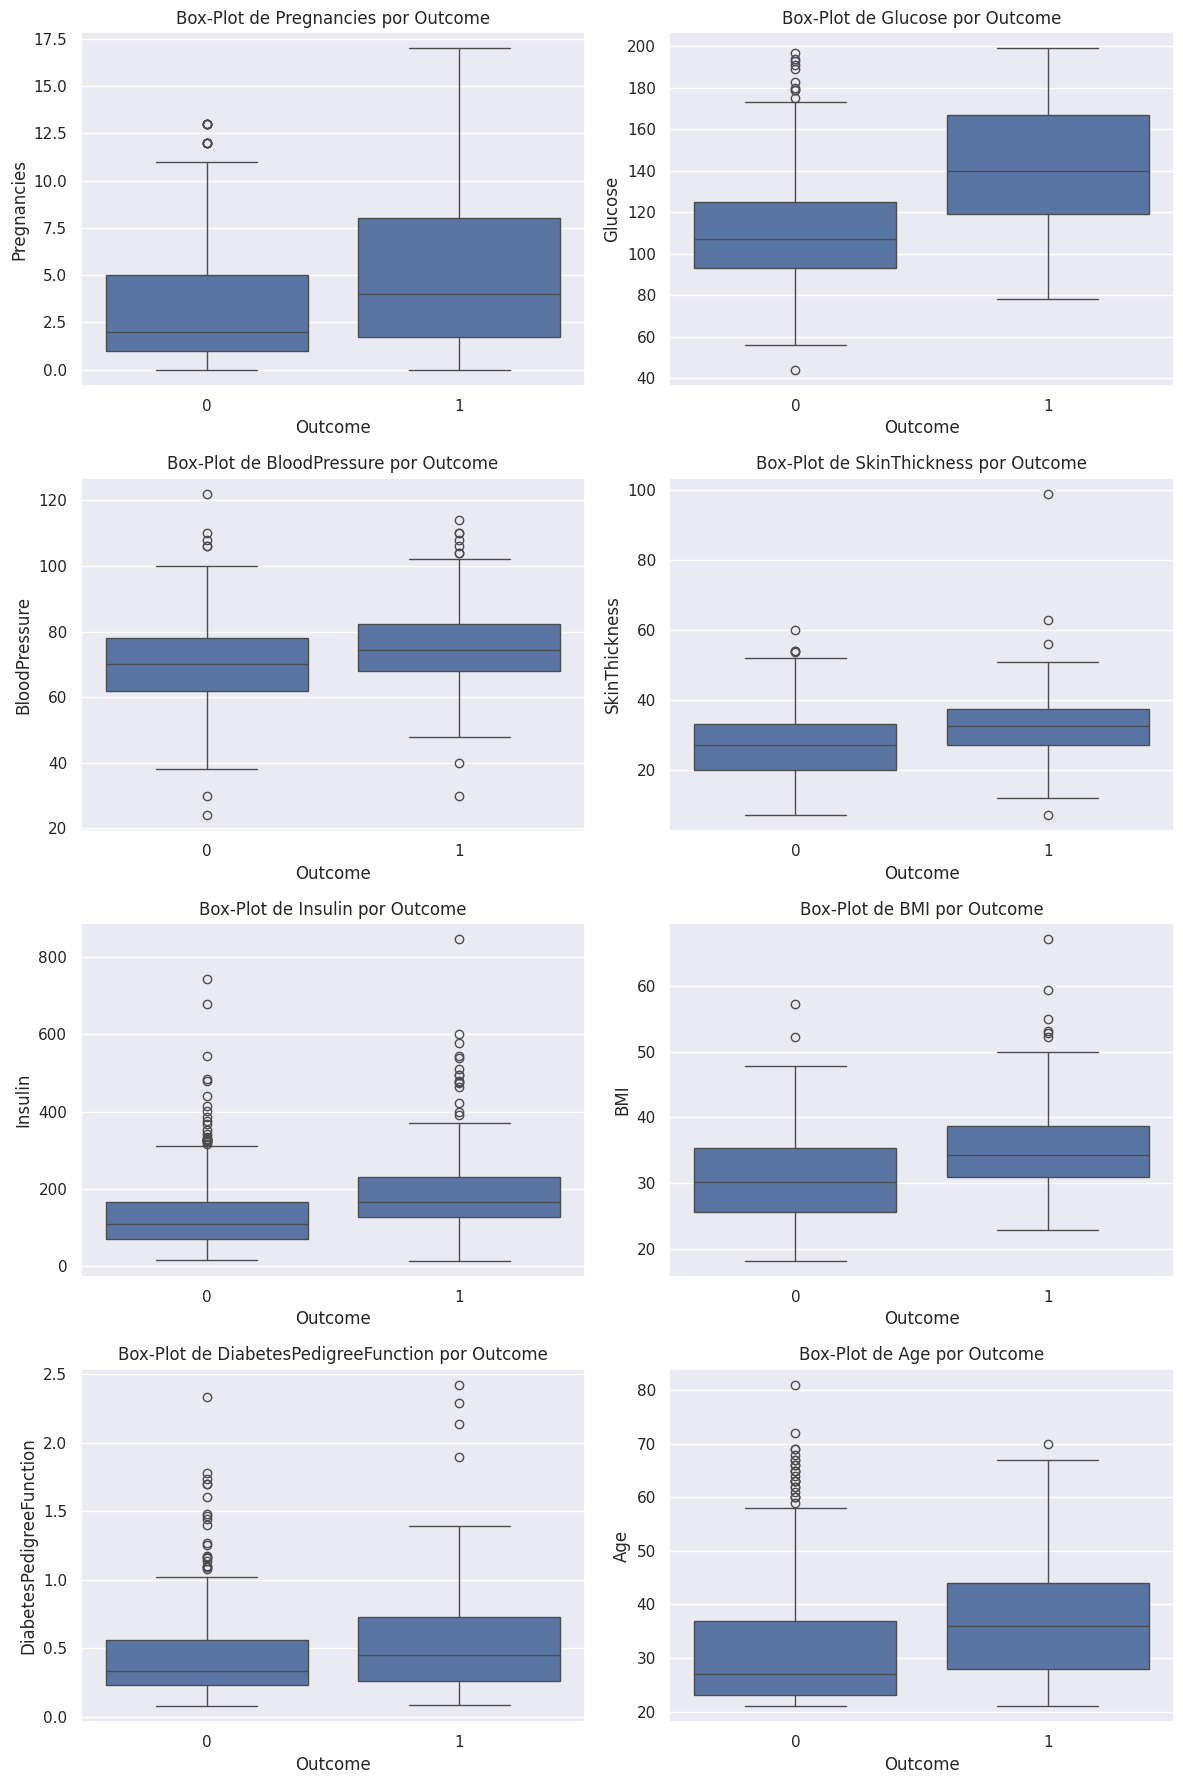

In [11]:
# Crea una figura y ejes para los subplots
fig, axes = plt.subplots(math.ceil(len(df.columns[:-1]) / 2), 2, figsize=(12, 18))

# Itera sobre cada variable numérica y su subplot
for columna, ax in zip(df.columns[:-1], axes.flatten()):
    sns.boxplot(data=df, x='Outcome', y=columna, ax=ax)
    ax.set_title(f"Box-Plot de {columna} por Outcome")

# Ajusta automáticamente el diseño
plt.tight_layout()
plt.show()

In [13]:
#METODO IQR
#Capturar los cuantiles de interes, es decir: 0.25, 0.75
q1 = df['Pregnancies'].quantile(0.25)
q3 = df['Pregnancies'].quantile(0.75)

#Calcular rango intercuartílico
iqr = q3-q1

#Calcular límite
limite = 1.5 * iqr

#Calcular límite inferior
limite_inf = q1 - limite

#Calcular límite superior
limite_sup = q3 + limite

#Capturar atípicos por medio de mascara booleana
atipicos = (df['Pregnancies'] < limite_inf) | (df['Pregnancies'] > limite_sup)

#Generar base de valores atípicos
df[atipicos]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.000000,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.000000,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.000000,36.6,0.412,46,1
455,14,175.0,62.0,30.0,199.666667,33.6,0.212,38,1


In [16]:
# Identificar outliers
outliers_pregnancies = df[df['Pregnancies'] > limite_sup]
print(f"Número de outliers en Pregnancies: {len(outliers_pregnancies)}")
print(outliers_pregnancies[['Pregnancies']])

Número de outliers en Pregnancies: 4
     Pregnancies
88            15
159           17
298           14
455           14


Los valores atípicos para la variable Pregnancies ascienden a 4 registros,  Es decir, dentro de esta variable existen valores estadisticamente diferentes al resto de los datos. Los valores atípicos detectados.

#PROCESO PARA ENCONTRAR DATOS ATIPICOS.
1. Análisis Exploratorio Inicial (EDA)
Comprender la distribución de los datos usando df.describe() para ver la estadística descriptiva. Realizar visualizaciones rápidas en forma de diagramas de caja.
2. Métodos para Detección de Outliers
A. Método del Rango Intercuartílico (IQR)
El método más robusto para datos no normales (como los médicos del ejemplo):

 a) Calcular cuartiles y limite usando estas formulas:

 Q1 = df['Glucose'].quantile(0.25)

Q3 = df['Glucose'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR

limite_superior = Q3 + 1.5 * IQR

 b) Filtrar outliers:

outliers = df[(df['Glucose'] < limite_inferior) | (df['Glucose'] > limite_superior)]

print(f"Número de outliers en Glucose: {len(outliers)}")

3. Validación de Outliers




# SM11 - REGRESIÓN LINEAL
La regresión lineal es un modelo que busca dependencias lineales entre variables independientes (características) y una dependiente (target).

###Características del modelo
--> Asume linealidad y disytribución gaussiana.

--> Sensible a las correlaciones altas entre variables.

--> Recomienda estandarización / normalización.

###Métricas de evaluación:

R²: Proporción de la variación explicada por el modelo

RMSE: Raíz del MSE, en unidades de la variable objetivo.

MAE: Error absoluto promedio.

###Implementación con Skicit-learn
1. Preparación de los datos

2. División en train/test.

3. Instanciar y entrenar "LinearRegression()".

4. Predecir y evaluar con métricas

###Análisis Exploratorio

Matriz de correlación:

--> Pearson: Mide la dependencia lineal entre variables.

--> Spearman: Evalúa relación monotónica.

Visualización: Mapa de Calor para ver las correlaciones

###Regresión Ridge

Proceso de regularización para evitar el sobreajuste.Se hace penalizando coeficientes grandes.(coefic. mas pequeños pero todos permanecen en el modelo.

###Regresión Lasso

Similar a Ridge, pero puede eliminar variables irrelevantes (pone coeficientes a cero).

###Elastic-Net

Combinacion de Ridge y Lasso. Maneja casos en donde hay correlaciones altas entre variables (Lasso selecciona una al azar)



In [19]:
# Importar bibliotecas
import pandas as pd # manejo de datos
import numpy as np # manejo numérico
import matplotlib.pyplot as plt # graficos
import seaborn as sns # graficos


# Importar módulo para ignorar errores
from warnings import filterwarnings
filterwarnings('ignore')
#@title Importar set de datos
data = pd.read_csv("https://raw.githubusercontent.com/lecuevasp/BaseDeDatos/refs/heads/main/USA_Housing.csv", sep = ',')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [21]:
#@title Capturar tipo de dato
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [30]:
del data['Address']

In [47]:
# Matriz de correlaciones
corr_matrix = data.iloc[:,:-1].corr(method='pearson') # spearman
corr_matrix

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000


Aqui se ven los niveles de correlación entre las variables, por ejemplo:

-->Avg. Area Income vs Avg. Area House Age (-0.002):

Prácticamente no hay relación lineal.

-->Avg. Area Number of Rooms vs Avg. Area Number of Bedrooms (0.463):

Correlación positiva moderada.

Interpretación: A más habitaciones, tiende a haber más dormitorios (lógico, pero no es una relación fuerte). Cuidado!: Podría generar multicolinealidad si ambas se usan en un modelo lineal (Ridge/Lasso/Elastic-Net ayudan a manejar esto).

-->Area Population vs Avg. Area Number of Bedrooms (-0.022):

Relación inversa casi insignificante. No son útiles para predecir una variable en función de la otra.

--> No hay correlaciones cercanas a |1|, por lo que no es estrictamente necesario eliminar variables de alta correlación. Esto quiere decir que no hay riesgo de multivcolinealidad.

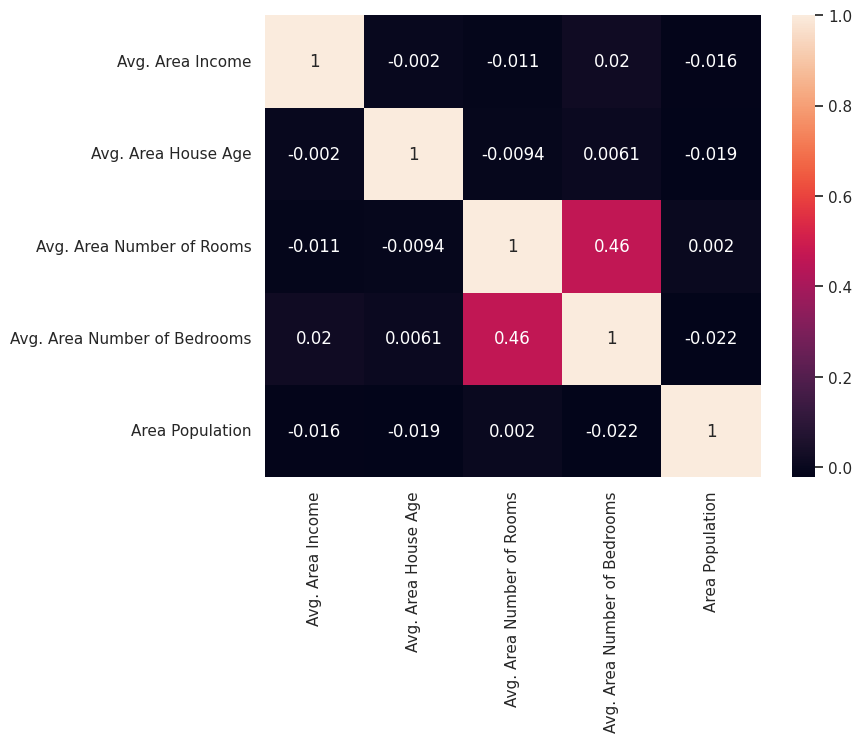

In [48]:
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [49]:
#Definimos algunas funciones para calcular las métricas
#------------------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Importar métricas de rendimientos
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

#@title Crear función para visualizar métricas
def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'MAE': mean_absolute_error(y_verdadero, y_calculado),
        'MSE': mean_squared_error(y_verdadero, y_calculado),
        'RMSE': np.sqrt(mean_squared_error(y_verdadero, y_calculado)),
        'R2': r2_score(y_verdadero, y_calculado)
    }
    return pd.DataFrame(metrics, index=[modelo])

In [50]:
#@title Entrenamiento de un modelo de regresion  lineal.
#Matrices X e Y
y = data['Price']
X = data.drop(columns = 'Price')

In [51]:
#Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Entrenaremos el modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

from sklearn.model_selection import train_test_split

train_test_split(X, y, test_size=0.3, random_state=2025)

[      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
 1301      57367.831888             5.716789                   8.861872   
 3559      74270.591009             5.098065                   7.183800   
 2984      71244.170747             6.477169                   5.331010   
 403       79045.039804             5.539686                   8.203295   
 3274      57944.657410             5.766112                   7.015360   
 ...                ...                  ...                        ...   
 3576      62384.572515             6.500024                   7.693402   
 4256      82748.751364             5.554757                   7.999048   
 1932      72432.264658             5.827764                   6.752229   
 323       70759.855804             6.367973                   5.493294   
 2910      71499.806645             5.533016                   6.767607   
 
       Avg. Area Number of Bedrooms  Area Population  
 1301                          4.34     477

In [52]:
#Usamos el conjunto de prueba pa evaluar el modelo.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

La regresión lineal a menudo hará predicciones más confiables si reescala las variables de entrada usando la estandarización o la NORMALIZACIÓN de datos.

In [53]:
#Normalizando los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', MinMaxScaler())
])

X_train_min_max = pipeline.fit_transform(X_train)
X_test_min_max = pipeline.transform(X_test)

# Primeros registros
X_train_min_max[0:5]

array([[0.44014403, 0.4437868 , 0.74775793, 0.52      , 0.68483954],
       [0.62815067, 0.35327763, 0.52471082, 0.92666667, 0.60257963],
       [0.59448829, 0.55501768, 0.2784403 , 0.08      , 0.22457582],
       [0.68125609, 0.41787948, 0.66022078, 0.72444444, 0.3534869 ],
       [0.44655997, 0.45100191, 0.50232193, 0.51111111, 0.64922234]])

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

# Primeros registros
X_train[0:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1301,57367.831888,5.716789,8.861872,4.34,47734.102214
3559,74270.591009,5.098065,7.183800,6.17,42021.225223
2984,71244.170747,6.477169,5.331010,2.36,15769.199970
403,79045.039804,5.539686,8.203295,5.26,24721.959043
3274,57944.657410,5.766112,7.015360,4.30,45260.519742


### Regresión Lineal

In [55]:
from sklearn.linear_model import LinearRegression
# Instanciar modelo de regresión
lin_reg = LinearRegression()
# Ajustar los datos de entrenamiento a una regresión lineal
lin_reg.fit(X_train,y_train)

LinearRegression()

In [56]:
lin_reg.coef_

array([2.15105776e+01, 1.66086287e+05, 1.20796237e+05, 2.27686986e+03,
       1.52243682e+01])

In [57]:
# Intercepto
print(lin_reg.intercept_)

-2638399.3858315116


In [58]:
# Coeficientes de la regresión
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.510578
Avg. Area House Age,166086.286565
Avg. Area Number of Rooms,120796.236585
Avg. Area Number of Bedrooms,2276.869860
Area Population,15.224368


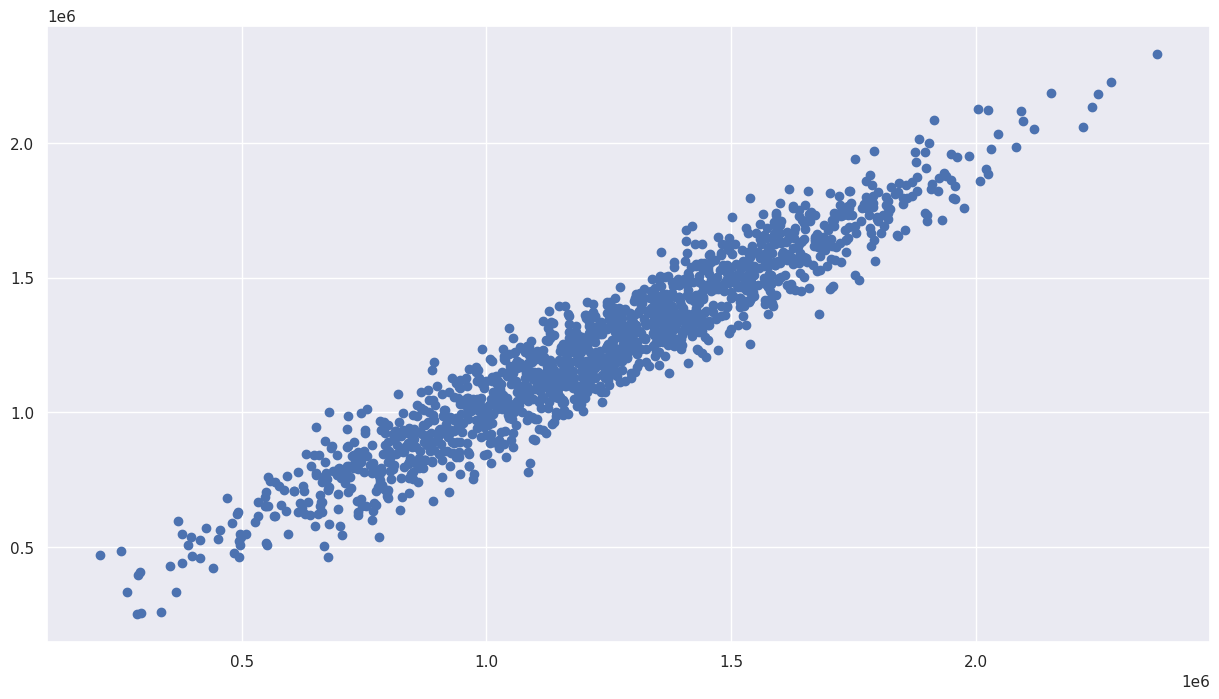

In [59]:
# Predicción de nuestro modelo
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)

<Axes: xlabel='Price', ylabel='Density'>

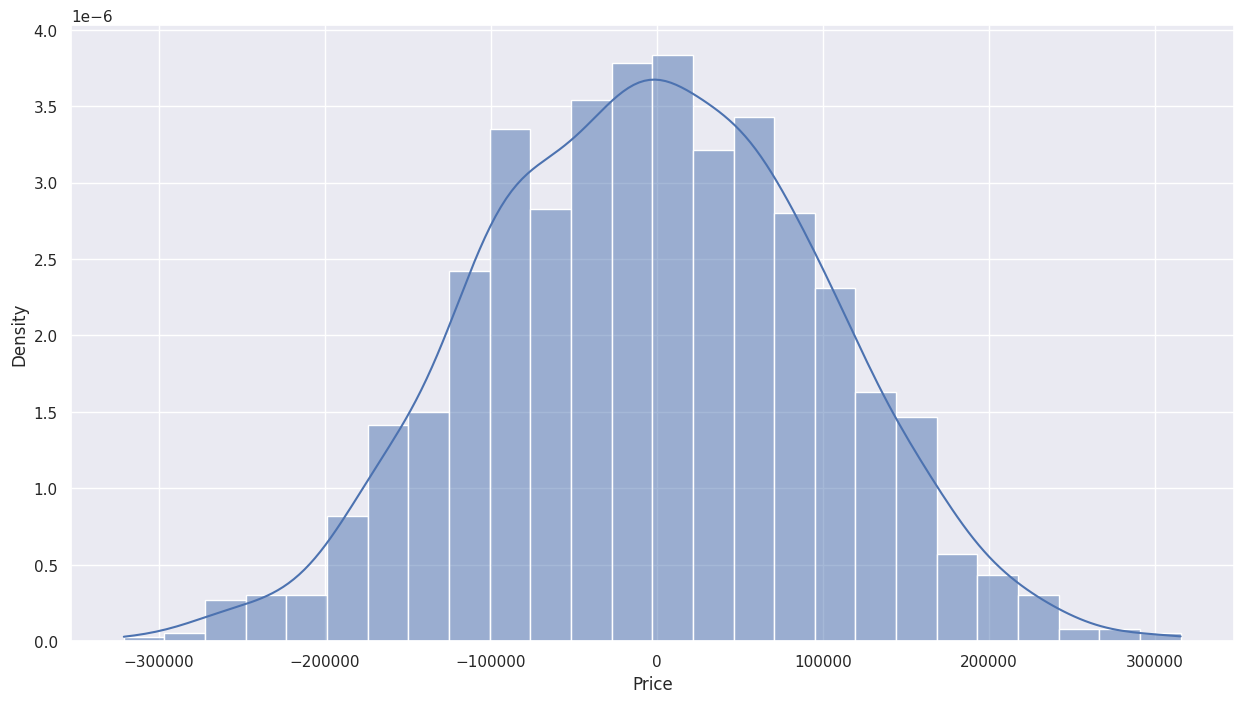

In [60]:
# Histograma de los residuo (diferencia entre  valor real y valor predicho)
sns.histplot((y_test - pred), kde=True, stat="density")

In [61]:
# Calculando las métricas de la regresión lineal
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
fn_metricas_info('Regresion Lineal',y_train, train_pred)


Train set evaluation:
_____________________________________


,MAE,MSE,RMSE,R2
Regresion Lineal,81150.282134,1.020447e+10,101017.176395,0.919227


In [62]:
print('Test set evaluation:\n_____________________________________')
fn_metricas_info('Regresion Lineal', y_test, test_pred)

Test set evaluation:
_____________________________________


,MAE,MSE,RMSE,R2
Regresion Lineal,81907.689804,1.026548e+10,101318.690654,0.914983


In [69]:
df_resultados = fn_metricas_info('Regresion Lineal', y_test, test_pred)

df_resultados

,MAE,MSE,RMSE,R2
Regresion Lineal,81563.302734,1.033717e+10,101671.873149,0.920077


###REGRESIÓN RIDGE

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, random_state=0)

# Particionar data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Primeros registros
X_train[0:5]

array([[ 0.8820858 ,  0.47493768,  0.2135076 ,  1.21581933, -0.66175338],
       [ 0.12942398,  0.13034685, -1.78149272, -1.35902999,  1.60971646],
       [-0.25461195, -0.38555165, -0.48271322, -1.52906721,  1.22206855],
       [ 0.4816291 , -1.36801503, -1.61474697, -1.40761205, -0.18499586],
       [ 0.40006467,  2.59109186,  1.2142315 , -0.4359708 , -0.1192717 ]])

In [64]:
#@title Instanciar el modelo Ridge y aplicar a nuestro set de entrenamiento y test
from sklearn.linear_model import Ridge

ridge = Ridge(alpha= 0.5, random_state=2025)

ridge

Ridge(alpha=0.5, random_state=2025)

In [65]:
# Entrenar modelo datos train
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, random_state=2025)

In [66]:
# Obtener predicción desde datos de entrenamiento
y_train_pred = ridge.predict(X_train)

In [67]:
# Calculando las métricas de la regresión lineal
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

print('Train set evaluation:\n_____________________________________')
fn_metricas_info('Modelo Ridge',y_train, train_pred)


Train set evaluation:
_____________________________________


,MAE,MSE,RMSE,R2
Modelo Ridge,81265.929652,1.017044e+10,100848.579391,0.917071


In [68]:
print('====================================')

print('Test set evaluation:\n_____________________________________')
fn_metricas_info('Modelo Ridge', y_test, test_pred)

Test set evaluation:
_____________________________________


,MAE,MSE,RMSE,R2
Modelo Ridge,81563.302734,1.033717e+10,101671.873149,0.920077


Si comparamos con las métricas de la regresión Lineal, dan valores semejantes.

In [70]:
#@title Almacenar resultados del modelo
df_resultados = pd.concat([df_resultados, fn_metricas_info('Regresión Ridge',y_test, test_pred)])
df_resultados

,MAE,MSE,RMSE,R2
Regresion Lineal,81563.302734,1.033717e+10,101671.873149,0.920077
Regresión Ridge,81563.302734,1.033717e+10,101671.873149,0.920077


In [71]:
#@title Determinar el mejor alfa
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

# particiones
particiones = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Definir el rango de valores de alpha
param_grid = {'alpha': [0,0.1,0.5,1,5]}

# Crear el modelo de regresión Ridge
ridge = Ridge()

# Configurar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=particiones, scoring='neg_mean_squared_error')

# Realizar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']

print("El mejor valor de alpha es:", best_alpha)


El mejor valor de alpha es: 0.5


alpha (λ) es el parámetro de regularización que controla la fuerza de la penalización L2 (suma de los cuadrados de los coeficientes).
A mayor alpha, más se contraen los coeficientes hacia cero (pero nunca llegan a cero).
Por tanto, alpha = 0.5 es a quel que a través de la validación cruzada minimiza el MSE.

###RESUMEN

### Regresión Lineal
Objetivo: Modelar la relación entre las variables predictoras (Avg. Area Income, Avg. Area House Age, etc.) y el target (ej. Price).

Pasos Clave:

1. Preprocesamiento:

Estandarización de features con StandardScaler (media=0, desviación=1).

División en train/test (X_train, X_test, y_train, y_test).

2. Entrenamiento:

Uso de LinearRegression() (sin regularización).

3. Evaluación:

Métricas como MSE, R² para medir rendimiento.

Problema:

Si hay multicolinealidad (correlación alta entre variables) o muchas features, puede sufrir overfitting.

###regresión Ridge
Objetivo: Mejorar la generalización del modelo penalizando coeficientes grandes.

Pasos Clave:

1. Búsqueda del Mejor alpha:

Usando GridSearchCV con validación cruzada (10 folds).

Rango probado: [0, 0.1, 0.5, 1, 5].

Mejor alpha encontrado: 0.5 (equilibrio óptimo entre sesgo y varianza).

2. Entrenamiento:

Ridge(alpha=0.5).fit(X_train_std, y_train).

3. Ventajas:

Reduce overfitting.

Maneja mejor la multicolinealidad (vs. regresión lineal).

Resultado:

Coeficientes más pequeños pero no cero (a diferencia de Lasso).

#Sm12_13 Supervisado_Clasificación

###Modelos de Clasificaxción
Modelos Binarios: Clasifican datos en dos categorías (ejemplo: "Sí" o "No").

Modelos Multiclase: Clasifican datos en más de dos categorías.

###Metricas de evaluación
Matriz de confusión: Herramienta clave para evaluar rendimiento de los modelos de clasificación.

--> VP: instancias positivas clasificadas correctamente.

--> VN: instancias negativas clasificadas correctamente.

--> FP: instancias negativas clasificadas incorrectamente como positivas. (error tipo I)

--> FN: Instancias positivas clasificadas incorrectamente como negativas. (error tipo Ii)

Luego...

Accuracy = VP+VN / Total de Datos

Tasa de errores = FN + FP / Total de datos

Sensibilidad (recall) = VP / VP + FN

Especificidad = VN / VN - FP

Precisión (Clase Positiva) = VP / VP + FP o valor predictivo negatvo = VN / VN + FN

###Implementación de algoritmos.
KNN: Algoritmo basafo en proximidad, el cual clasifica un punto de datos segun la mayoría de etiquetas de sus k vecinos mas cercanos en el espacio de características. Un k pequeño puede causar sobre ajuste, mientras que uno grande puede suavizar demasiado el modelo.

In [2]:
# importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, cohen_kappa_score
from IPython import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [3]:
#@title Función para generar métricas
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, average=None)))
  print("Recall       : {}".format(recall_score(y_true, y_pred, average=None)))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred, average=None)))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))

In [ ]:
#@title Función para generar métricas
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, average=None)))
  print("Recall       : {}".format(recall_score(y_true, y_pred, average=None)))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred, average=None)))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))

In [4]:
#@title Crear función para visualizar métricas
def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'Accuracy': "%.5f" % accuracy_score(y_verdadero, y_calculado),
        'Precisión': "{}".format(precision_score(y_verdadero, y_calculado, average=None)),
        'Recall': "{}".format(recall_score(y_verdadero, y_calculado, average=None)),
        'Puntuación F1': "{}".format(f1_score(y_verdadero, y_calculado, average=None)),
        'Cohen Kappa': "{}".format(cohen_kappa_score(y_verdadero, y_calculado))
    }
    return pd.DataFrame(metrics, index=[modelo])

In [6]:
# Importar set de datos
archivo = 'https://raw.githubusercontent.com/lecuevasp/BaseDeDatos/refs/heads/main/diabetes_imputados_knn.csv'
df = pd.read_csv(archivo, sep = '|')
# Primeros registros
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [8]:
#@title Particionar set de datos
X = df.drop(columns = 'Outcome')
y = df['Outcome']

In [9]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=2025)
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn_clf", KNeighborsClassifier(n_neighbors=5))
])
# Realizar modelo KNN
cv = cross_val_score(knn,X, y, cv = kfold, scoring = 'accuracy')
print(f"Media Accuray: {cv.mean()}")

Media Accuray: 0.7422205245734658


In [13]:
print(f"Std Accuray: {cv.std()}")
# Importar biblioteca
from sklearn.neighbors import KNeighborsClassifier

Std Accuray: 0.013377197515165693


In [14]:
#@title Identificando la variables independente y el target
X = df.drop(columns = 'Outcome')
y = df['Outcome']
#@title Particionar set de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state =2025)

In [15]:
#@title Instanciar algoritmo de clasificación KNeighbors
knn_clf = KNeighborsClassifier()
# Aplicar modelo a datos de entrenamietno
knn_classifier = knn_clf.fit(X_train, y_train)

In [16]:
#@title Generar predicciones con datos test
y_pred_knn = knn_classifier.predict(X_test)

In [17]:
pd.concat([pd.DataFrame(y_pred_knn.T), pd.DataFrame(y_test.T).reset_index(drop=True)], axis = 1 )

,0,Outcome
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
149,1,0
150,1,0
151,1,0
152,0,0


In [18]:
#@title Generar la matriz de confusión
confusion_matrix(y_test, y_pred_knn)

array([[74, 17],
       [26, 37]])

¿Que dice esta matriz?

VP (Verdaderos Positivos): 74 → Casos positivos clasificados correctamente.

FP (Falsos Positivos): 17 → Casos negativos clasificados incorrectamente como positivos (Error Tipo I).

FN (Falsos Negativos): 26 → Casos positivos clasificados incorrectamente como negativos (Error Tipo II).

VN (Verdaderos Negativos): 37 → Casos negativos clasificados correctamente.


In [20]:
#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_pred_knn)

Accuracy     : 0.721
Precisión    : [0.74       0.68518519]
Recall       : [0.81318681 0.58730159]
Puntuación F1: [0.77486911 0.63247863]
Cohen Kappa  : 0.4094881398252185


In [21]:
#@title Mostrar Reporte
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        91
           1       0.69      0.59      0.63        63

    accuracy                           0.72       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



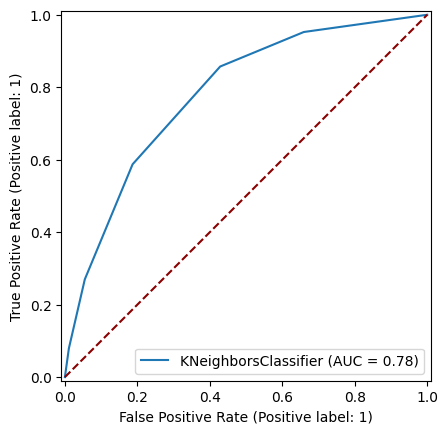

In [23]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(knn_clf , X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state =2025)

In [25]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [26]:
#@title Ajustes de Hiperparámetros
# Generar las particiones
particiones = KFold(n_splits=5, shuffle=True, random_state=0)
# Generar diccionario con los hiperparámetros a aplicar
param_grid = {'n_neighbors': list(range(4,15)),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]} # p=1 distancia de Manhattan; p=2 distancia euclidiana.
# Instanciar el modelo sin hiperparámetros
knn = KNeighborsClassifier()
# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_knn = GridSearchCV(knn, param_grid = param_grid, scoring='accuracy', cv = particiones)
# Entrenar el modelo con datos train
mejor_modelo_knn.fit(X_train_std, y_train)
# Obtener los mejores parámetros
mejor_modelo_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

#CONCLUSION
KNN:

El proceso típico en tu archivo seguiría estos pasos:

1. Cargar y preprocesar datos (normalización).

2. Dividir en entrenamiento/prueba.

3. Entrenar KNN y predecir.

4. Evaluar con matriz de confusión y métricas.

5. Ajustar hiperparámetros (k, métrica de distancia).

# Algoritmos utilizados
### KNN

###Regresion Logistica
Implementación básica para problemas binarios (ejemplo: diagnóstico médico).

###Arboles de decisión
Explicación de su interpretabilidad y manejo de datos no lineales.

###Random Forest
Mejora la precisión combinando múltiples árboles de decisión.